In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, Callback
from keras.optimizers import Adam

Importing Dataset

In [3]:
train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

Checking the shape of the dataset.It has pixels that range from 0-255

In [4]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [5]:
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Finding any missing values.

In [7]:
print("train missing values:", train.isnull().any().sum())
print("test missing values:", test.isnull().any().sum())

train missing values: 0
test missing values: 0


Getting our y into a different variable and splitting the data

In [8]:
X = train.iloc[:,1:] #taking all but the first row
Y = train.iloc[:,0] #taking only the first row as this is the label

#splitting dataframe using train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, Y , test_size=0.1, random_state=42)

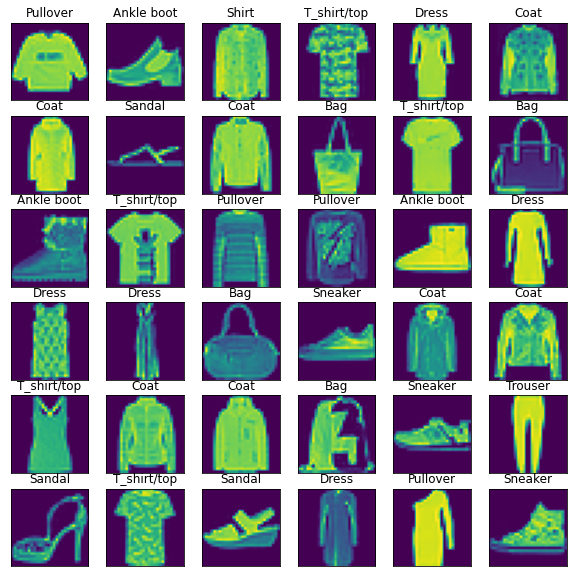

In [9]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X.loc[i].values.reshape((28,28))) #calling the .values of each row
    label_index = int(Y[i]) #setting as an int as the number is stored as a string
    plt.title(class_names[label_index])
plt.show()

Normalizing the pixels into the range 0 to 1.

In [10]:
x_train =x_train/255.0
x_test=x_test/255.0

In [11]:
#reshape
x_train =x_train.values.reshape(-1, 28,28,1)
#reshape
x_test = x_test.values.reshape(-1, 28,28,1)

In [12]:
#label encoding
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

In [13]:
print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (54000, 28, 28, 1)
X_test shape:  (6000, 28, 28, 1)
y_train shape:  (54000, 10)
y_test shape:  (6000, 10)


Data Augumnetation.Increase the size of data so that model can get more images to train.

In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range= 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1
)

datagen.fit(x_train)

In [17]:
train_generator = datagen.flow(x_train, y_train, batch_size = 64)

validation_generator = datagen.flow(x_test, y_test, batch_size = 64)

Creating the Model

In [22]:
model = Sequential() # Initialize the sequential model

# Add CNN convolutions with BatchNormalization and MaxPooling2D
# Avoid overfitting with Dropout
model.add(Conv2D(32, kernel_size = (3,3), input_shape=(28, 28, 1), padding = 'Same', activation='relu'))
model.add(Conv2D(64, kernel_size = (3,3), padding = 'Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = (3,3), padding = 'Same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid'))
model.add(Dropout(0.2))

# Convert our matrix to 1-D set of features 
model.add(Flatten())

# Add fully-conected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.20))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(10, activation='softmax'))

In [27]:
# Defining the call backs EarlyStopping and myCallback which will stop the training
# if the accuracy reaches 99%

class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.999):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

# Instantiate callback
mycallback = myCallback()


early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=3,
                                        verbose = 2,
                                        restore_best_weights=True)



In [28]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(lr = 1e-3),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 64)        36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 27, 27, 64)       

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


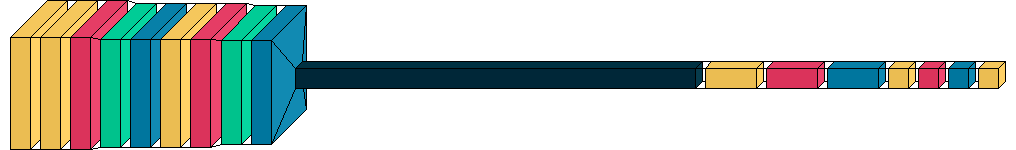

In [35]:
!pip install visualkeras
import visualkeras

visualkeras.layered_view(model)

In [33]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = x_train.shape[0] // 128,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = x_test.shape[0] // 64,
    callbacks = [mycallback,early_stopping_callback]
)

Epoch 1/50
421/421 [==============================] - 237s 564ms/step - loss: 0.6745 - accuracy: 0.7503 - val_loss: 2.4248 - val_accuracy: 0.4824
Epoch 2/50
421/421 [==============================] - 236s 561ms/step - loss: 0.5117 - accuracy: 0.8101 - val_loss: 0.5151 - val_accuracy: 0.7986
Epoch 3/50
421/421 [==============================] - 245s 583ms/step - loss: 0.4444 - accuracy: 0.8375 - val_loss: 0.4071 - val_accuracy: 0.8483
Epoch 4/50
421/421 [==============================] - 236s 562ms/step - loss: 0.4120 - accuracy: 0.8512 - val_loss: 0.4068 - val_accuracy: 0.8469
Epoch 5/50
421/421 [==============================] - 236s 560ms/step - loss: 0.3800 - accuracy: 0.8606 - val_loss: 0.4118 - val_accuracy: 0.8416
Epoch 6/50
421/421 [==============================] - 244s 579ms/step - loss: 0.3710 - accuracy: 0.8649 - val_loss: 0.3780 - val_accuracy: 0.8575
Epoch 7/50
421/421 [==============================] - 236s 561ms/step - loss: 0.3664 - accuracy: 0.8640 - val_loss: 0.3503 -

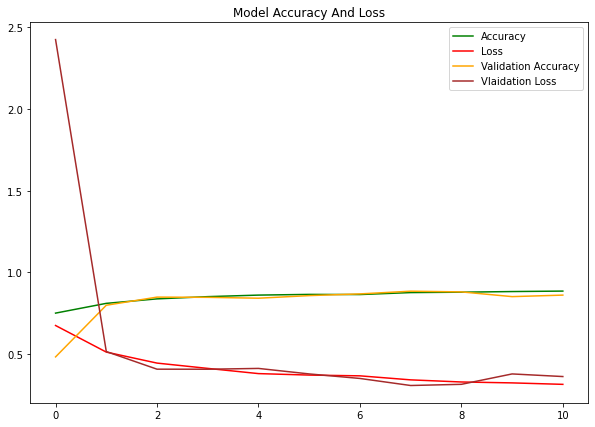

In [37]:
plt.figure(figsize=(10, 7))
acc = history.history["accuracy"]
loss = history.history["loss"]

epochs = range(len(acc))
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]


plt.plot(epochs, acc, "g", label="Accuracy")
plt.plot(epochs, loss, "r", label="Loss")

plt.plot(epochs, val_acc, "orange", label="Validation Accuracy")
plt.plot(epochs, val_loss, "brown", label="Vlaidation Loss")
plt.title("Model Accuracy And Loss")
plt.legend()
plt.show()

In [43]:
# Save the model
model.save('model.h5')

In [38]:
predict=model.predict(x_test)

In [39]:
y_pred=[]
for i in range(len(predict)):
    y_pred.append(np.argmax(predict[i]))

In [44]:
for i in range(5):
    print(y_pred[i])

7
8
8
5
9


In [46]:
y = np.argmax(y_test, axis=-1)

In [47]:
y

array([7, 8, 8, ..., 6, 0, 4])

In [56]:
mat=confusion_matrix(y,y_pred)
mat

array([[527,   0,   9,   3,   0,   0,  60,   0,   2,   0],
       [  0, 566,   0,   8,   0,   0,   2,   0,   0,   0],
       [  4,   2, 565,   2,  43,   0,  25,   0,   1,   0],
       [ 13,  12,   2, 566,  21,   0,  14,   0,   3,   0],
       [  1,   1,  22,  26, 507,   0,  29,   0,   1,   0],
       [  0,   0,   0,   0,   0, 551,   0,   1,   0,   4],
       [ 63,   3,  46,  13,  80,   0, 410,   0,   3,   0],
       [  0,   0,   0,   0,   0,  16,   0, 588,   0,   6],
       [  1,   0,   2,   0,   0,   0,   2,   0, 553,   0],
       [  0,   0,   0,   0,   0,   3,   0,  22,   0, 596]])

UPVOTE if you like this Notebook :)